In [2]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import sys
sys.path.append("../src/")
import data_loader as dl

In [3]:
latent = np.load("../data/latent/clf_latent/data_repr.npy")
#targets = np.load("../data/latent/clf_latent/targets.npy")
_, _, y = dl.load_simulated("128")

In [10]:
represent = latent[0]
#y = targets[0]

pca_rep = PCA(2).fit_transform(represent)

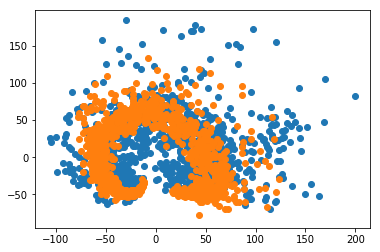

In [12]:
prot_ind = y.argmax(1) == 0
carb_ind = y.argmax(1) == 1
plt.scatter(pca_rep[prot_ind,0], pca_rep[prot_ind,1], )
plt.scatter(pca_rep[carb_ind,0], pca_rep[carb_ind,1], )

In [8]:
from sklearn.cluster import KMeans

clster_mod = KMeans(2, n_init=100, max_iter=1000, n_jobs=10)
clster_mod.fit(pca_rep)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=100, n_jobs=10, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
from sklearn.metrics import confusion_matrix, adjusted_mutual_info_score, adjusted_rand_score
pred = clster_mod.predict(pca_rep)
true = y.argmax(1)
confusion_matrix(true, pred)

array([[529, 677],
       [476, 718]])